<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [107]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])
print('libraries installed.')

libraries installed.


We will import the following libraries for the lab


In [108]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier
print('libraries imported.')

libraries imported.


This function is to plot the confusion matrix.


In [120]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [191]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)
print('data downloaded')

data downloaded


In [192]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [193]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)
print('data loaded.')

data loaded.


In [194]:
data.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

In [195]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [196]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [197]:
data.shape

(90, 18)

## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [198]:
# Convert to datetime, coerce errors to NaT (Not a Time)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data['year'] = data['Date'].dt.year
data['month'] = data['Date'].dt.month
data['day'] = data['Date'].dt.day
data['day_of_the_week'] = data['Date'].dt.day_name()
X = data.drop(columns=['Date','Class'])
y = data['Class'].to_numpy()

y


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


In [199]:
from sklearn.preprocessing import OneHotEncoder
one_hot = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
one_hot

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [200]:
scaler = preprocessing.StandardScaler()
scaler

StandardScaler()

In [201]:
numeric_list = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_list

['FlightNumber',
 'PayloadMass',
 'Flights',
 'Block',
 'ReusedCount',
 'Longitude',
 'Latitude']

In [202]:
categorical_list = X.select_dtypes(include=['object', 'bool', 'int32']).columns.tolist()
categorical_list

['BoosterVersion',
 'Orbit',
 'LaunchSite',
 'Outcome',
 'GridFins',
 'Reused',
 'Legs',
 'LandingPad',
 'Serial',
 'year',
 'month',
 'day',
 'day_of_the_week']

In [203]:
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, numeric_list),
        ('cat', one_hot, categorical_list)
    ]
)
preprocessor

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 ['FlightNumber', 'PayloadMass', 'Flights',
                                  'Block', 'ReusedCount', 'Longitude',
                                  'Latitude']),
                                ('cat',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['BoosterVersion', 'Orbit', 'LaunchSite',
                                  'Outcome', 'GridFins', 'Reused', 'Legs',
                                  'LandingPad', 'Serial', 'year', 'month',
                                  'day', 'day_of_the_week'])])

## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [204]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

we can see we only have 18 test samples.


In [205]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [206]:
lr = LogisticRegression()
lr

LogisticRegression()

In [207]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', lr)
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['FlightNumber',
                                                   'PayloadMass', 'Flights',
                                                   'Block', 'ReusedCount',
                                                   'Longitude', 'Latitude']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['BoosterVersion', 'Orbit',
                                                   'LaunchSite', 'Outcome',
                                                   'GridFins', 'Reused', 'Legs',
                                                   'LandingPad', 'Serial',
                                                   'year', 'month', 'day',
                                                   'day_of_the_week'])])),
                ('classifier', LogisticRegression())])

In [208]:
parameters ={'classifier__C':[0.01,0.1,1],
             'classifier__penalty':['l2'],
             'classifier__solver':['lbfgs']}

In [209]:
parameters ={'classifier__C':[0.01,0.1,1],'classifier__penalty':['l2'], 'classifier__solver':['lbfgs']}# l1 lasso l2 ridge

In [210]:
cv=10

In [212]:
logreg_cv = GridSearchCV(estimator=pipeline, param_grid=parameters, cv=cv, scoring='accuracy')  
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['FlightNumber',
                                                                          'PayloadMass',
                                                                          'Flights',
                                                                          'Block',
                                                                          'ReusedCount',
                                                                          'Longitude',
                                                                          'Latitude']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['BoosterVersion',
                                                                          'Orbit',
                                                                          'LaunchSite',
                                                                          'Outcome',
                                                                          'GridFins',
                                                                          'Reused',
                                                                          'Legs',
                                                                          'LandingPad',
                                                                          'Serial',
                                                                          'year',
                                                                          'month',
                                                                          'day',
                                                                          'day_of_the_week'])])),
                                       ('classifier', LogisticRegression())]),
             param_grid={'classifier__C': [0.01, 0.1, 1],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['lbfgs']},
             scoring='accuracy')

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [213]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
accuracy : 0.8892857142857145


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [257]:
lr_score = logreg_cv.score(X_test, Y_test)
lr_score

0.8333333333333334

Lets look at the confusion matrix:


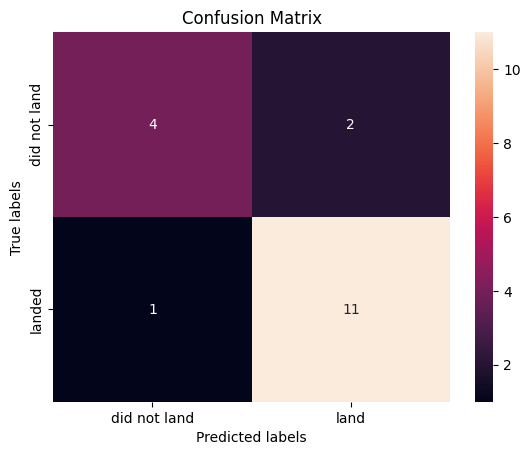

In [216]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [233]:
parameters = {'classifier__kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'classifier__C': np.logspace(-3, 3, 5),
              'classifier__gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm

SVC()

In [234]:
pipe_svc = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', svm)
])
pipe_svc

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['FlightNumber',
                                                   'PayloadMass', 'Flights',
                                                   'Block', 'ReusedCount',
                                                   'Longitude', 'Latitude']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['BoosterVersion', 'Orbit',
                                                   'LaunchSite', 'Outcome',
                                                   'GridFins', 'Reused', 'Legs',
                                                   'LandingPad', 'Serial',
                                                   'year', 'month', 'day',
                                                   'day_of_the_week'])])),
                ('classifier', SVC())])

In [235]:
svm_cv = GridSearchCV(estimator=pipe_svc, param_grid=parameters, cv=10, scoring='accuracy')  
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['FlightNumber',
                                                                          'PayloadMass',
                                                                          'Flights',
                                                                          'Block',
                                                                          'ReusedCount',
                                                                          'Longitude',
                                                                          'Latitude']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['BoosterVersion',
                                                                          'Orbit',
                                                                          'LaunchSite',
                                                                          'Outcome',
                                                                          'GridFins',
                                                                          'Reused',
                                                                          'Legs',
                                                                          'Lan...
                                                                          'month',
                                                                          'day',
                                                                          'day_of_the_week'])])),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'classifier__gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'classifier__kernel': ('linear', 'rbf', 'poly', 'rbf',
                                                'sigmoid')},
             scoring='accuracy')

In [236]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'classifier__C': 1.0, 'classifier__gamma': 0.001, 'classifier__kernel': 'linear'}
accuracy : 0.9446428571428573


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


In [256]:
svm_score = svm_cv.score(X_test, Y_test)
svm_score

1.0

We can plot the confusion matrix


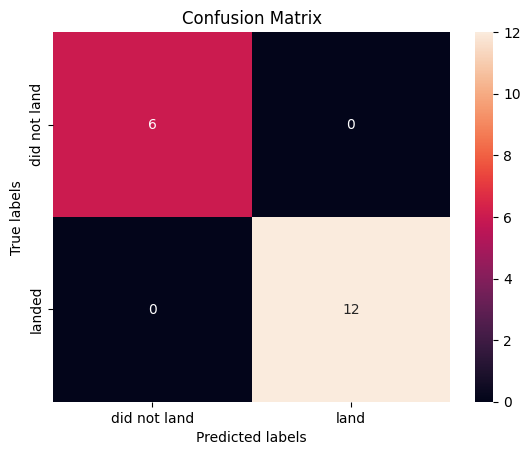

In [238]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [242]:
parameters = {'classifier__criterion': ['gini', 'entropy'],
     'classifier__splitter': ['best', 'random'],
     'classifier__max_depth': [2*n for n in range(1,10)],
     'classifier__max_features': ['auto', 'sqrt'],
     'classifier__min_samples_leaf': [1, 2, 4],
     'classifier__min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [243]:
tree_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', tree)
])
tree_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['FlightNumber',
                                                   'PayloadMass', 'Flights',
                                                   'Block', 'ReusedCount',
                                                   'Longitude', 'Latitude']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['BoosterVersion', 'Orbit',
                                                   'LaunchSite', 'Outcome',
                                                   'GridFins', 'Reused', 'Legs',
                                                   'LandingPad', 'Serial',
                                                   'year', 'month', 'day',
                                                   'day_of_the_week'])])),
                ('classifier', DecisionTreeClassifier())])

In [244]:
tree_cv = GridSearchCV(estimator=tree_pipe, param_grid=parameters, cv=10, scoring='accuracy')  
tree_cv.fit(X_train, Y_train)

/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/lib/python3.12/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/lib/python3.12/site-packages/sklearn/pipeline.py", line 475, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/li

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['FlightNumber',
                                                                          'PayloadMass',
                                                                          'Flights',
                                                                          'Block',
                                                                          'ReusedCount',
                                                                          'Longitude',
                                                                          'Latitude']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['BoosterVersion',
                                                                          'Orbit',
                                                                          'LaunchSite',
                                                                          'Outcome',
                                                                          'GridFins',
                                                                          'Reused',
                                                                          'Legs',
                                                                          'Lan...
                                                                          'day_of_the_week'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [2, 4, 6, 8, 10, 12, 14, 16,
                                                   18],
                         'classifier__max_features': ['auto', 'sqrt'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__splitter': ['best', 'random']},
             scoring='accuracy')

In [245]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'classifier__criterion': 'entropy', 'classifier__max_depth': 4, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 5, 'classifier__splitter': 'best'}
accuracy : 0.9464285714285715


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [255]:
tree_score = tree_cv.score(X_test, Y_test)
tree_score

0.7222222222222222

We can plot the confusion matrix


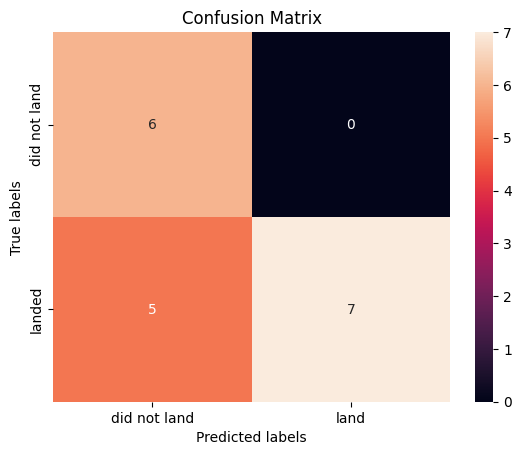

In [247]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [248]:
parameters = {'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'classifier__p': [1,2]}

KNN = KNeighborsClassifier()

In [249]:
knn_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNN)
])
knn_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['FlightNumber',
                                                   'PayloadMass', 'Flights',
                                                   'Block', 'ReusedCount',
                                                   'Longitude', 'Latitude']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['BoosterVersion', 'Orbit',
                                                   'LaunchSite', 'Outcome',
                                                   'GridFins', 'Reused', 'Legs',
                                                   'LandingPad', 'Serial',
                                                   'year', 'month', 'day',
                                                   'day_of_the_week'])])),
                ('classifier', KNeighborsClassifier())])

In [250]:
knn_cv = GridSearchCV(estimator=knn_pipe, param_grid=parameters, cv=10, scoring='accuracy')  
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['FlightNumber',
                                                                          'PayloadMass',
                                                                          'Flights',
                                                                          'Block',
                                                                          'ReusedCount',
                                                                          'Longitude',
                                                                          'Latitude']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse_output=False),
                                                                         ['BoosterVersion',
                                                                          'Orbit',
                                                                          'LaunchSite',
                                                                          'Outcome',
                                                                          'GridFins',
                                                                          'Reused',
                                                                          'Legs',
                                                                          'LandingPad',
                                                                          'Serial',
                                                                          'year',
                                                                          'month',
                                                                          'day',
                                                                          'day_of_the_week'])])),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__algorithm': ['auto', 'ball_tree',
                                                   'kd_tree', 'brute'],
                         'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10],
                         'classifier__p': [1, 2]},
             scoring='accuracy')

In [251]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 10, 'classifier__p': 2}
accuracy : 0.9053571428571429


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [254]:
knn_score = knn_cv.score(X_test, Y_test)
knn_score

0.7222222222222222

We can plot the confusion matrix


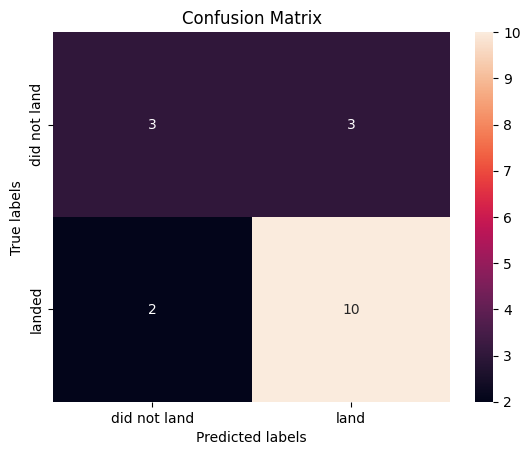

In [253]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [279]:
scores = [lr_score, svm_score, tree_score, knn_score]
names = ['Logistic Regression', 'Support Vector', 'Decision Tree', 'K-nearest neighbor']

<BarContainer object of 4 artists>

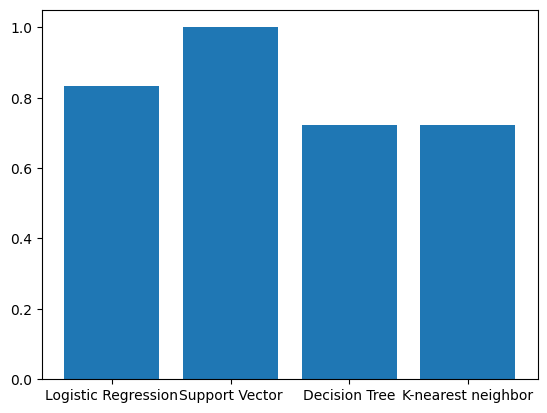

In [280]:
plt.bar(x=names, height=scores)

In [284]:
X_test.shape

(18, 20)

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
